In [1]:
import sys
sys.path.append('..')

import importlib

from config_simulation import (
    LIBRARY_ALGORITHMS,
    LIBRARY_OBJECTIVE_FUNCTIONS,
    simulation_linear_regression,
    simulation_logistic_regression,
    simulation_geometric_median,
    simulation_spherical_distribution,
    simulation_p_means,
)

N = 10
n = int(1e4)
batch_size = 1

# Compare SNA and SNA Riccati, should be the identical

SNA estimates the hessian matrix and then uses np.linalg.inv(), while SNA Riccati estimates the inverse of the hessian matrix directly using Riccati formula. The two methods should be identical.

In [2]:
from algorithms_numpy_online import SNA, SNARiccati, WASNA, WASNARiccati

optimizer_list = [
    SNA(nu=1.0),
    SNARiccati(nu=1.0),
    WASNA(nu=0.75),
    WASNARiccati(nu=0.75),
]

e_values = [1]

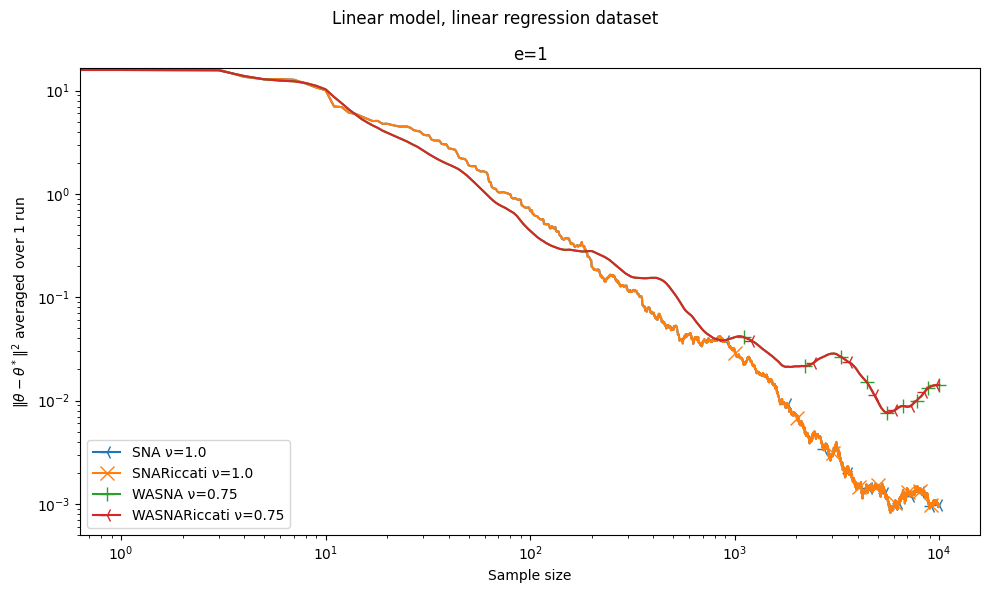

In [3]:
simulation = simulation_linear_regression(optimizer_list=optimizer_list)
simulation.e_values = e_values

# One run
simulation.run_multiple_datasets(N=1, n=n, batch_size=batch_size)

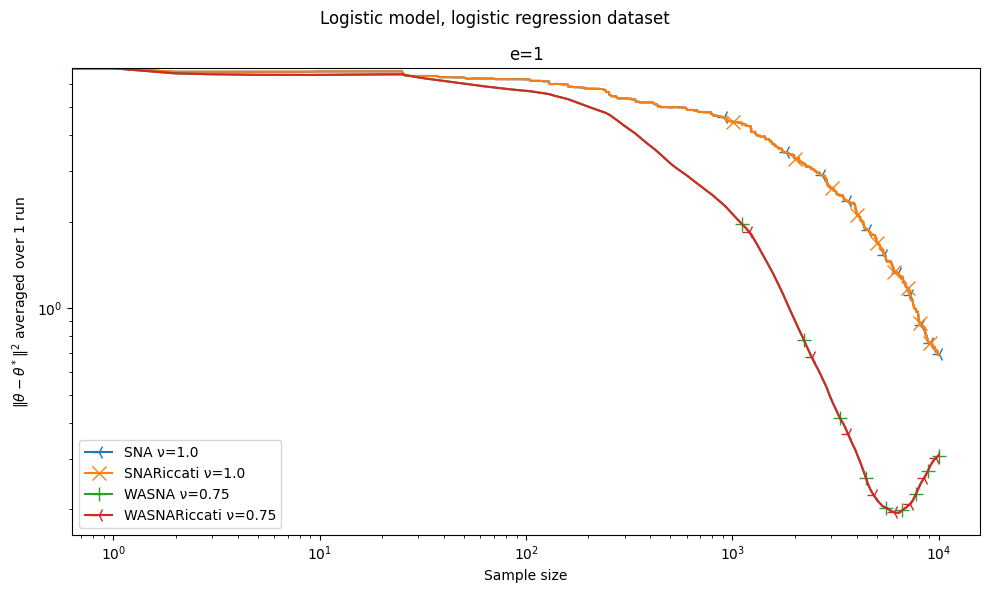

In [4]:
simulation = simulation_logistic_regression(optimizer_list=optimizer_list)
simulation.e_values = e_values

# One run
simulation.run_multiple_datasets(N=1, n=n, batch_size=batch_size)

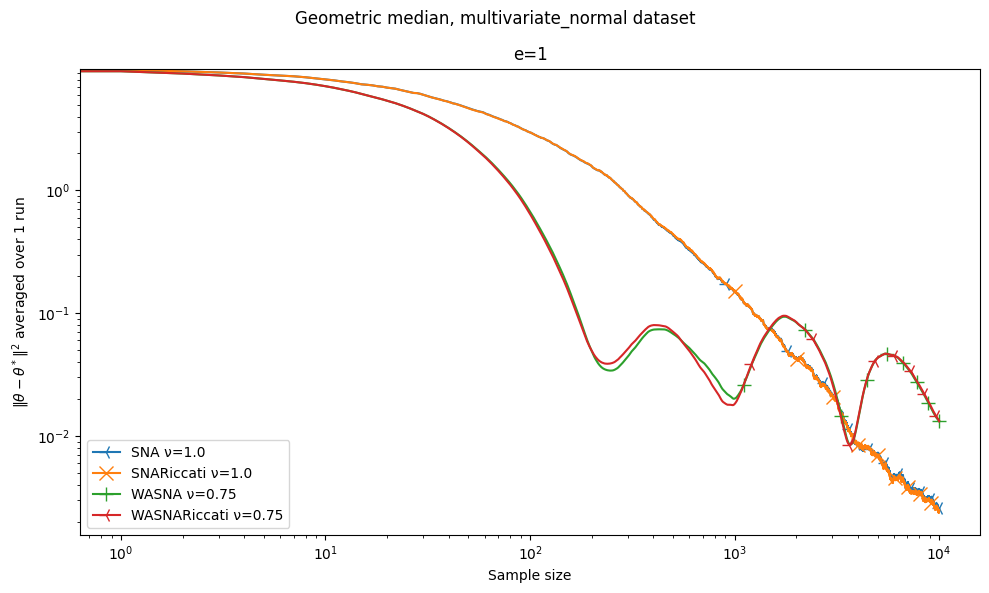

In [5]:
simulation = simulation_geometric_median(optimizer_list=optimizer_list)
simulation.e_values = e_values

# One run
simulation.run_multiple_datasets(N=1, n=n, batch_size=batch_size)

# Compare canonical Z and canonical deterministic Z, should be close

## USNA

In [6]:
from algorithms_numpy_online import USNA

optimizer_list = [
    USNA(nu=1.0, gamma=0.75, generate_Z="normal"),
    USNA(nu=1.0, gamma=0.75, generate_Z="canonic"),
    USNA(nu=1.0, gamma=0.75, generate_Z="canonic deterministic"),
    USNA(nu=1.0, gamma=1.0, generate_Z="normal"),
    USNA(nu=1.0, gamma=1.0, generate_Z="canonic"),
    USNA(nu=1.0, gamma=1.0, generate_Z="canonic deterministic"),
]

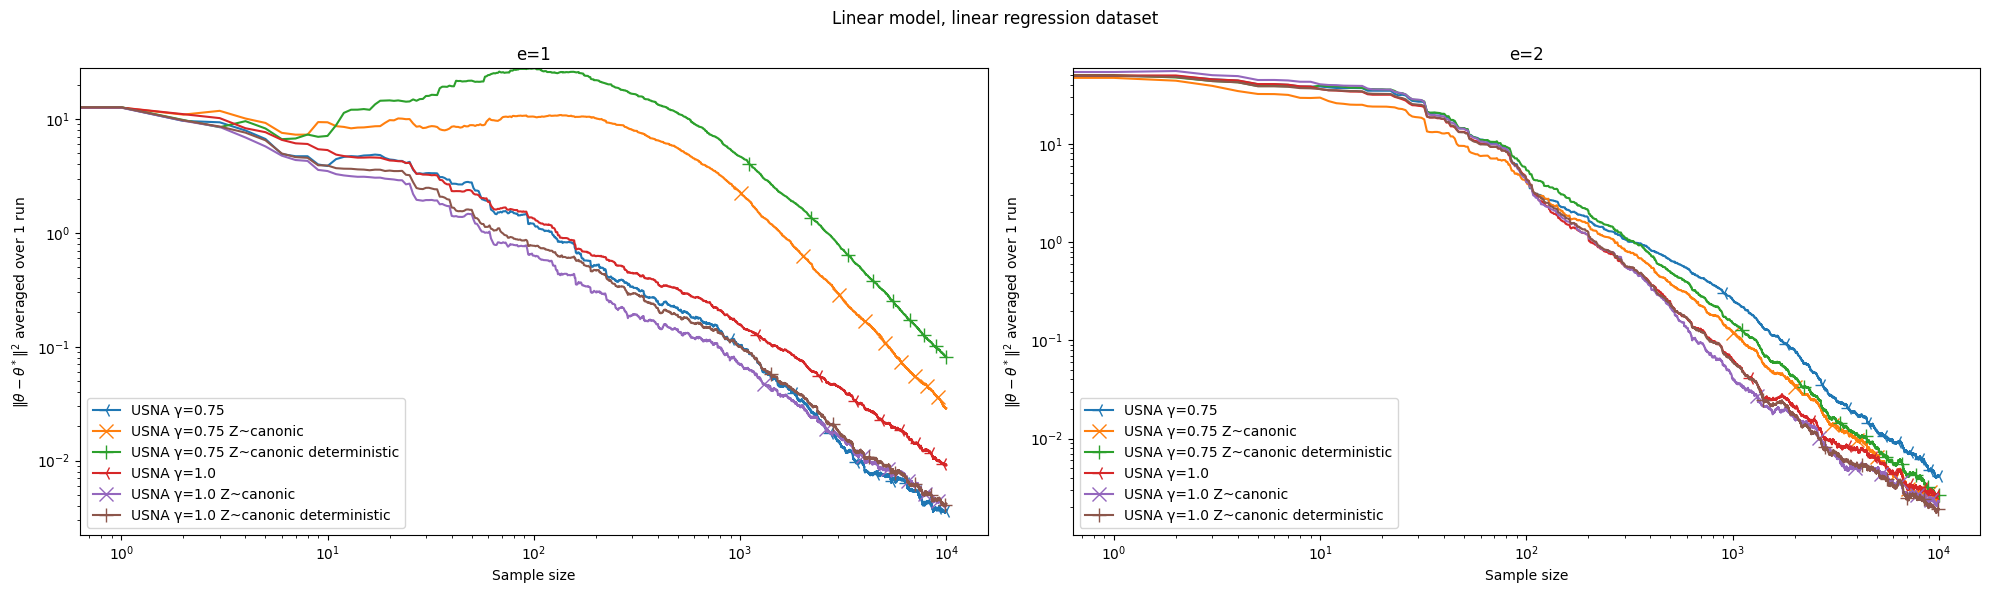

In [7]:
simulation = simulation_linear_regression(optimizer_list=optimizer_list)

# One run
simulation.run_multiple_datasets(N=1, n=n, batch_size=batch_size)

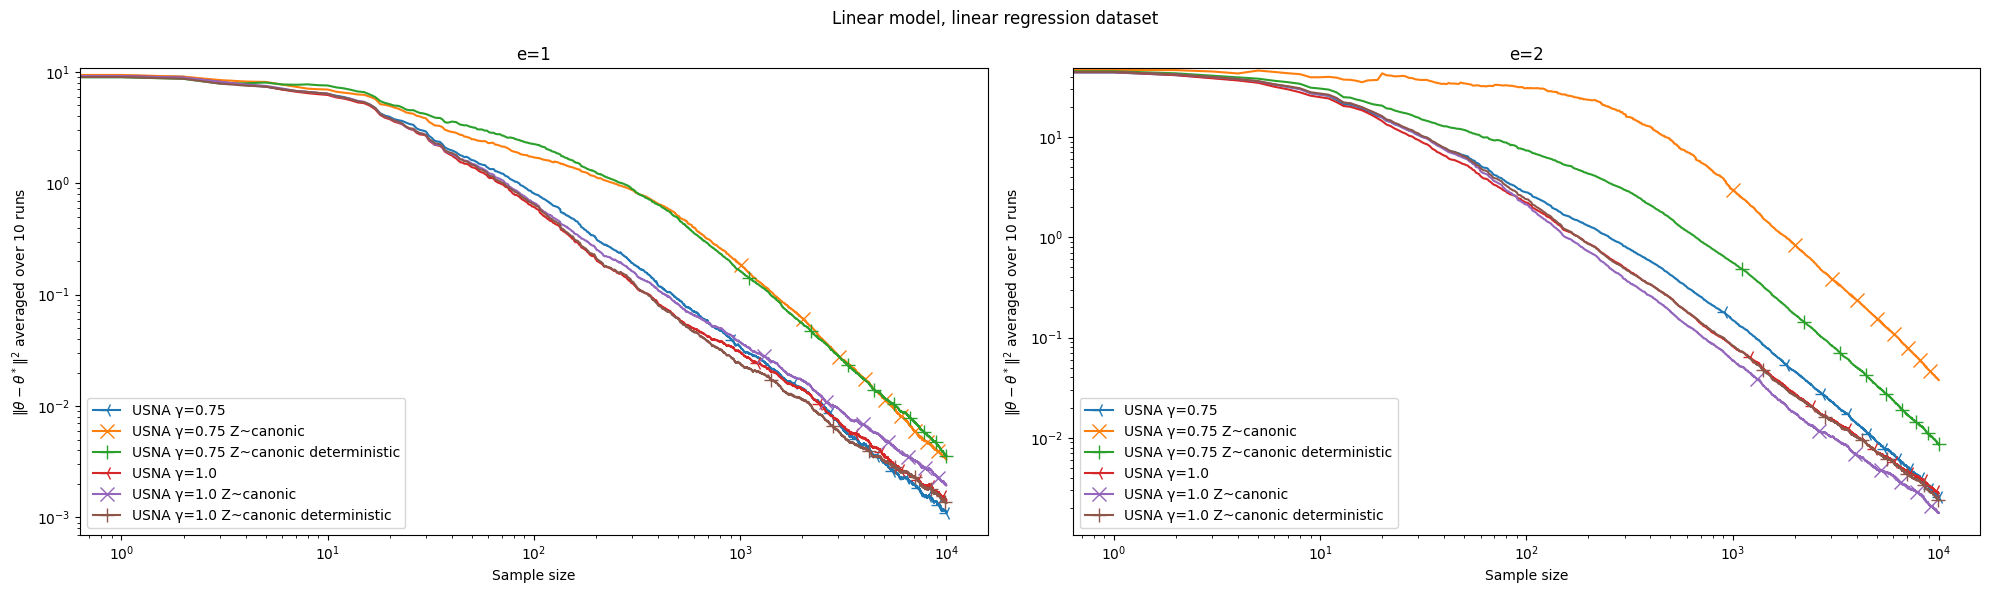

In [8]:
# Average over N runs
simulation.run_multiple_datasets(N=N, n=n, batch_size=batch_size)

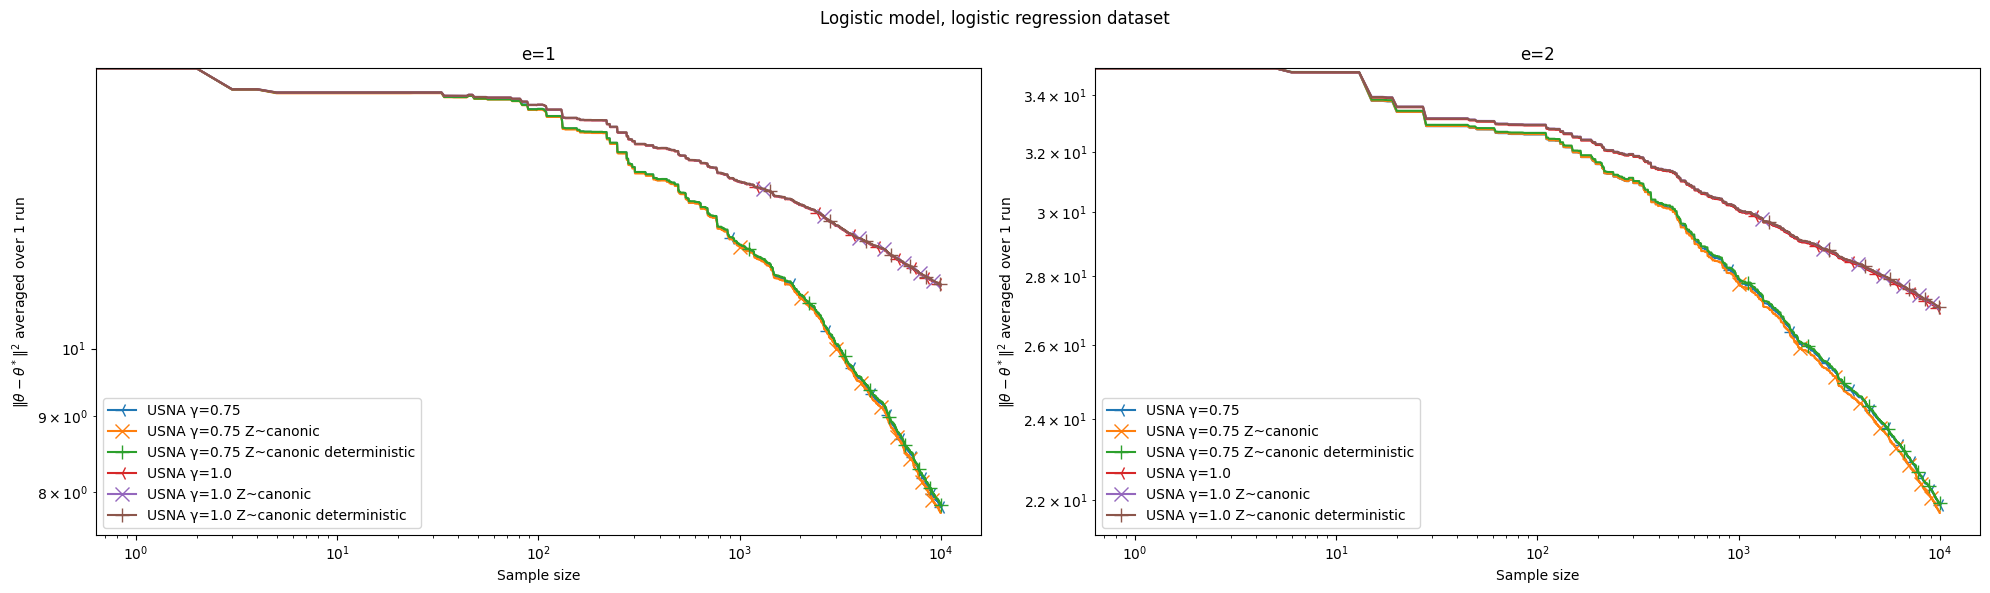

In [9]:
simulation = simulation_logistic_regression(optimizer_list=optimizer_list)

# One run
simulation.run_multiple_datasets(N=1, n=n, batch_size=batch_size)

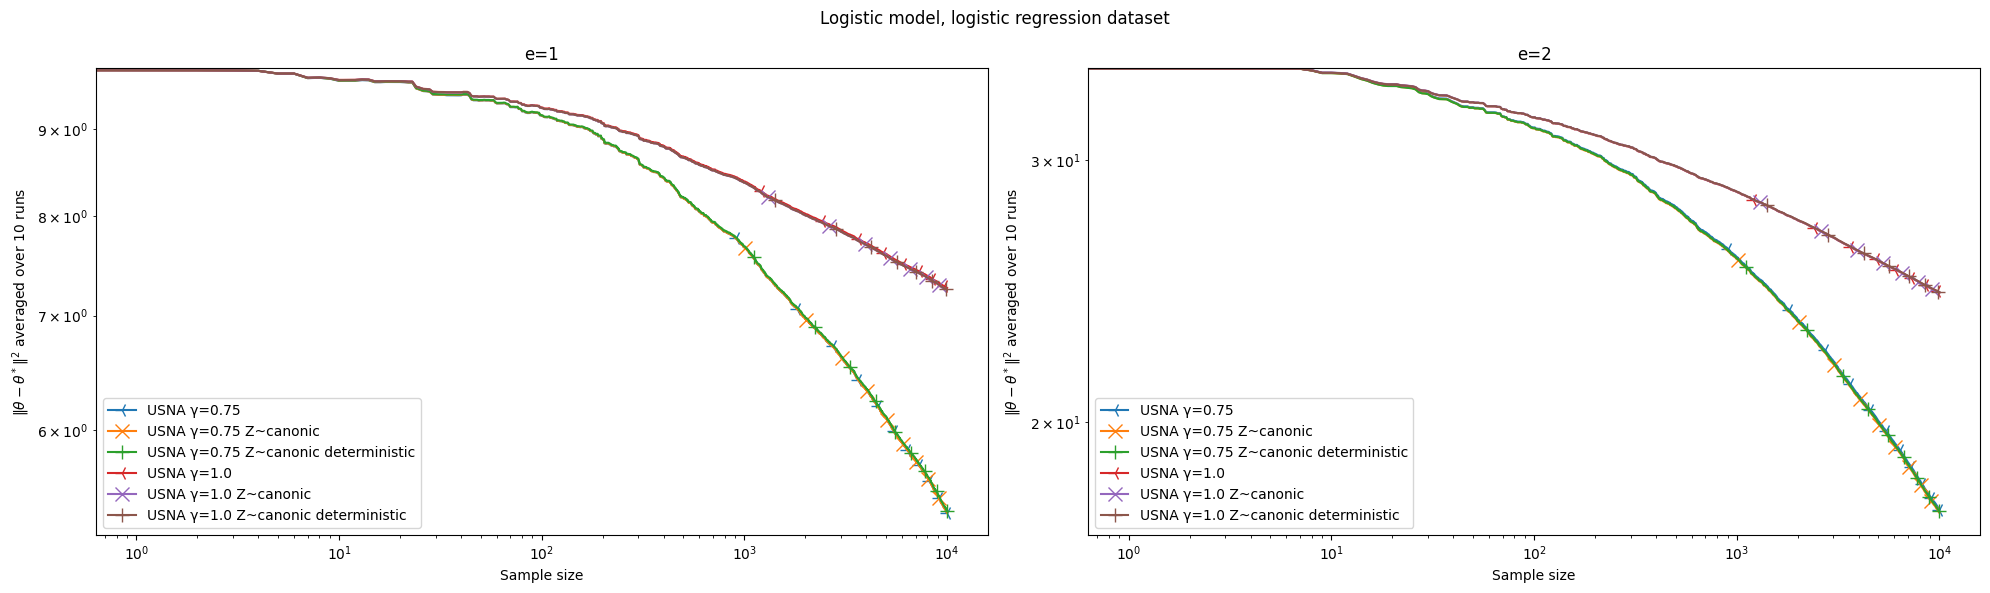

In [10]:
# Average over N runs
simulation.run_multiple_datasets(N=N, n=n, batch_size=batch_size)

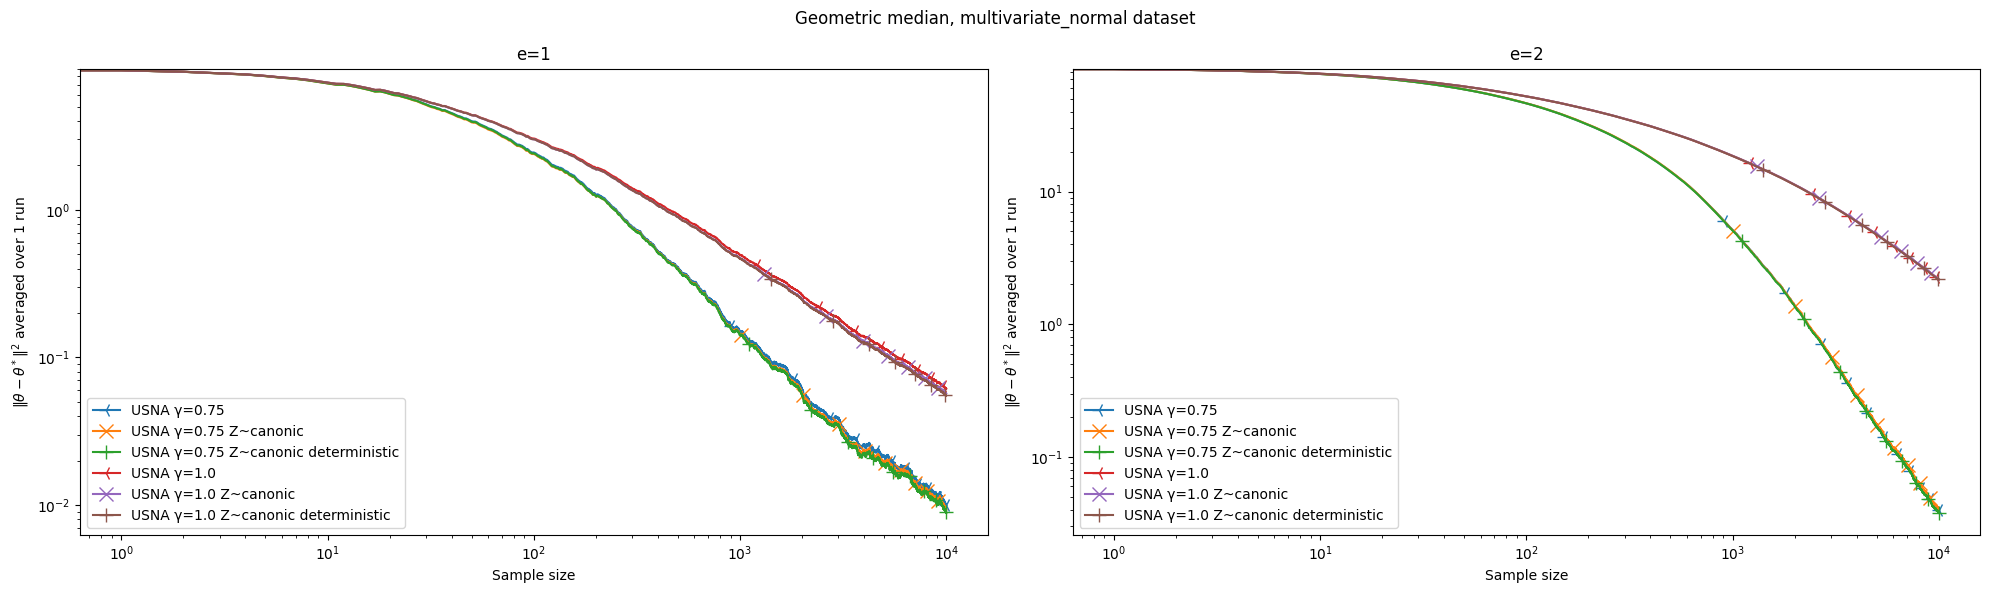

In [11]:
simulation = simulation_geometric_median(optimizer_list=optimizer_list)

# One run
simulation.run_multiple_datasets(N=1, n=n, batch_size=batch_size)

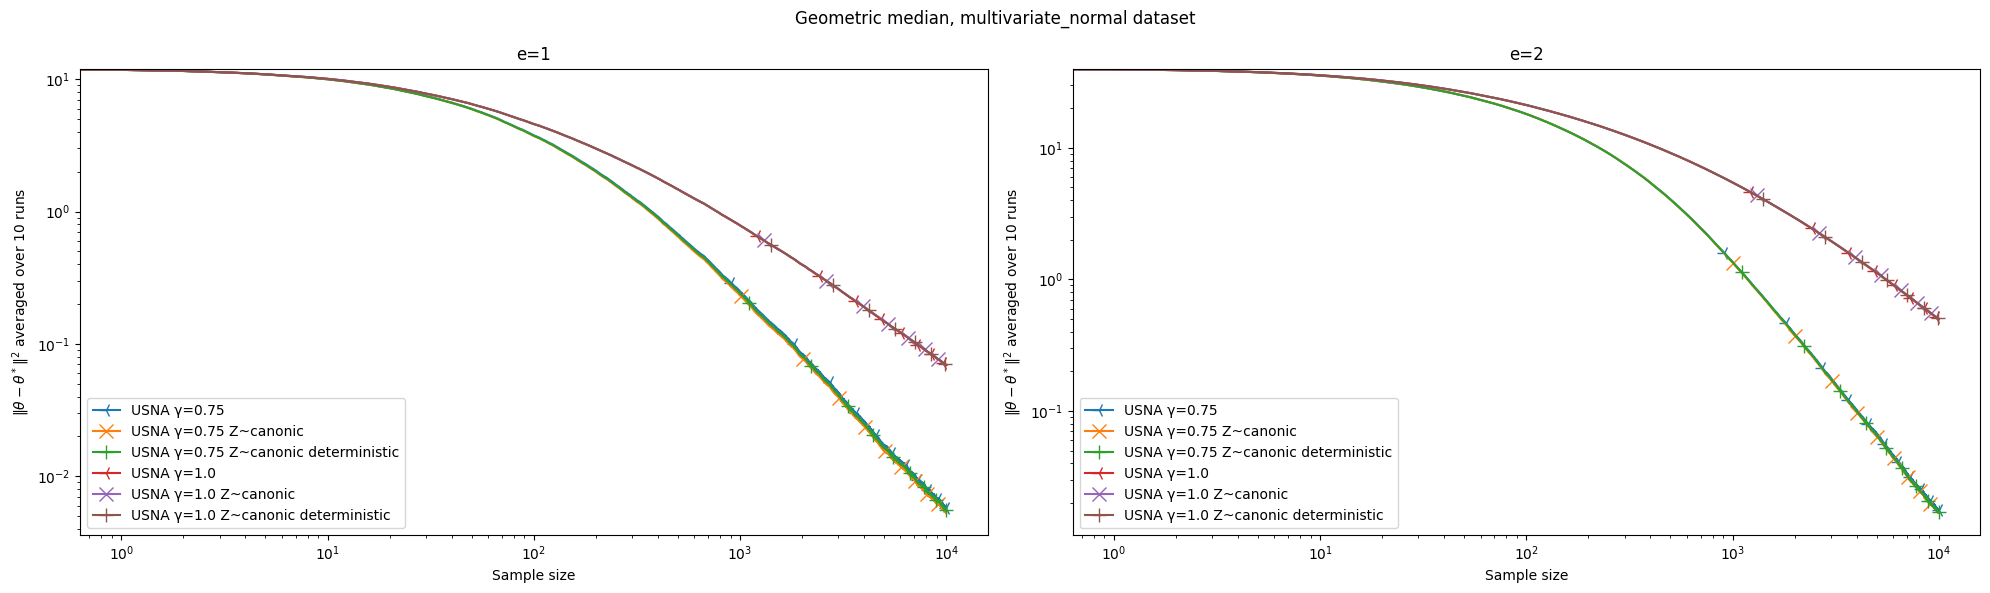

In [12]:
# Average over N runs
simulation.run_multiple_datasets(N=N, n=n, batch_size=batch_size)

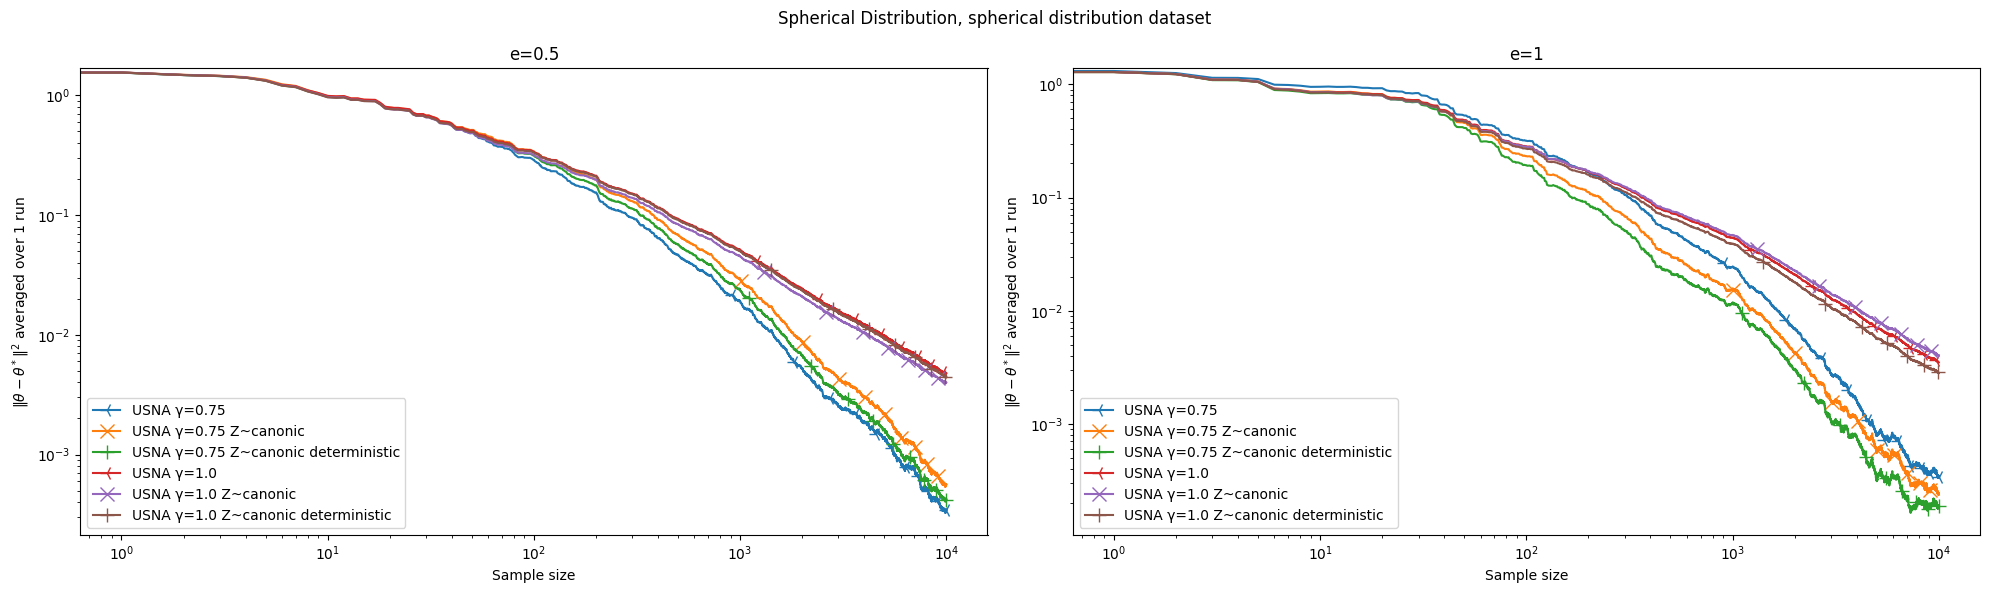

In [13]:
simulation = simulation_spherical_distribution(optimizer_list=optimizer_list)

# One run
simulation.run_multiple_datasets(N=1, n=n, batch_size=batch_size)

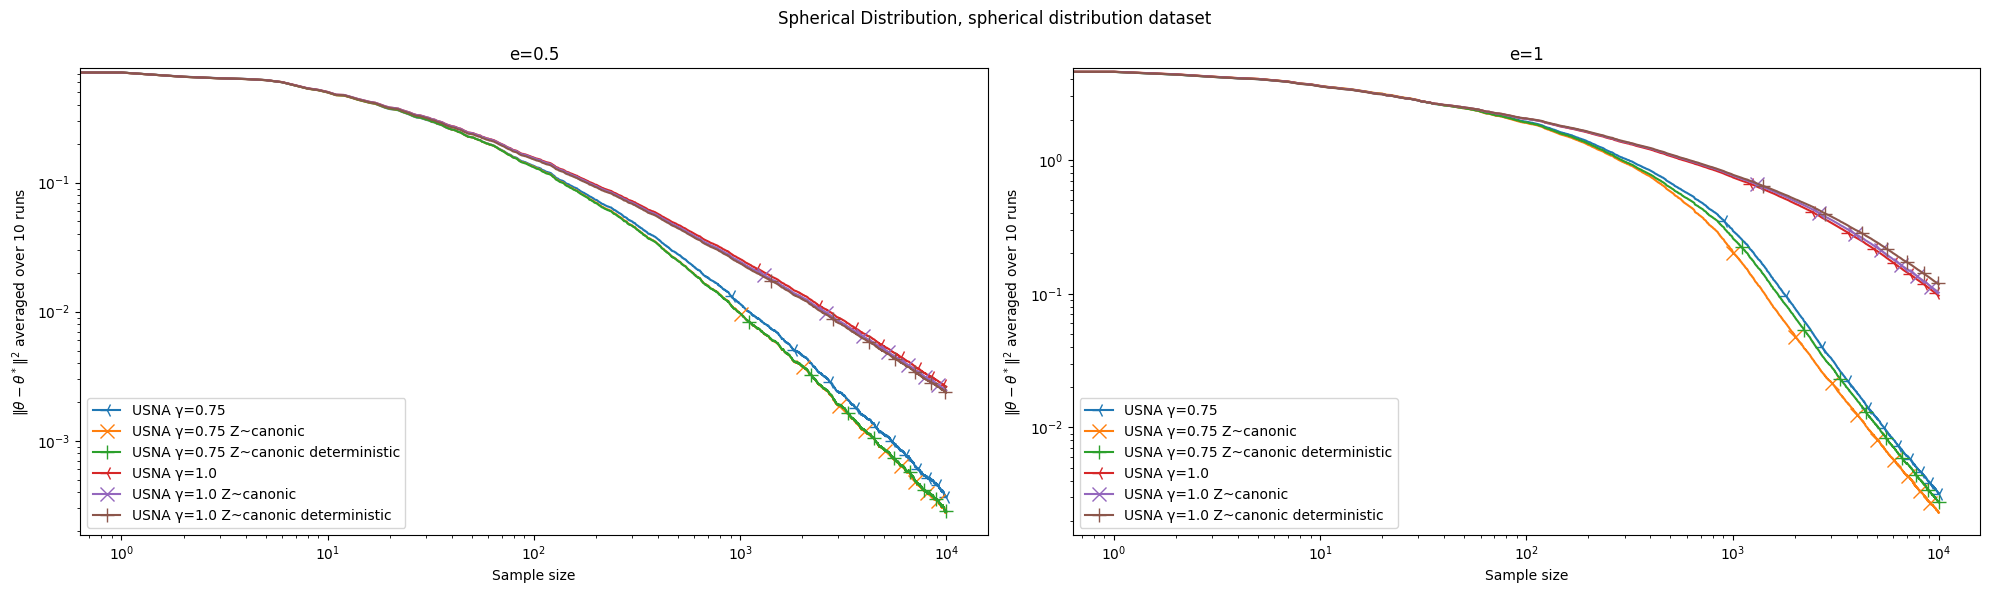

In [14]:
# Average over N runs
simulation.run_multiple_datasets(N=N, n=n, batch_size=batch_size)

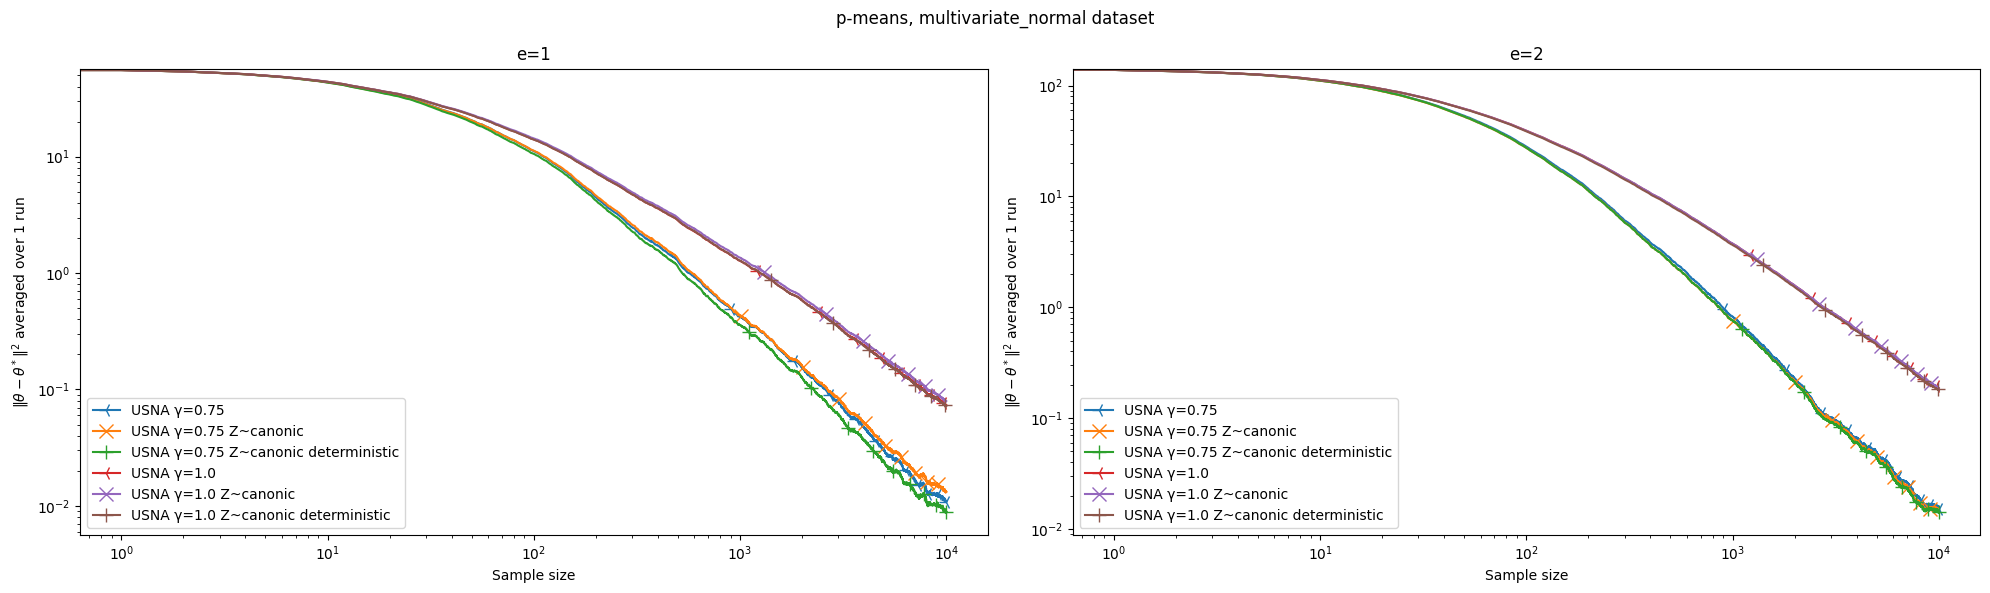

In [15]:
simulation = simulation_p_means(optimizer_list=optimizer_list)

# One run
simulation.run_multiple_datasets(N=1, n=n, batch_size=batch_size)

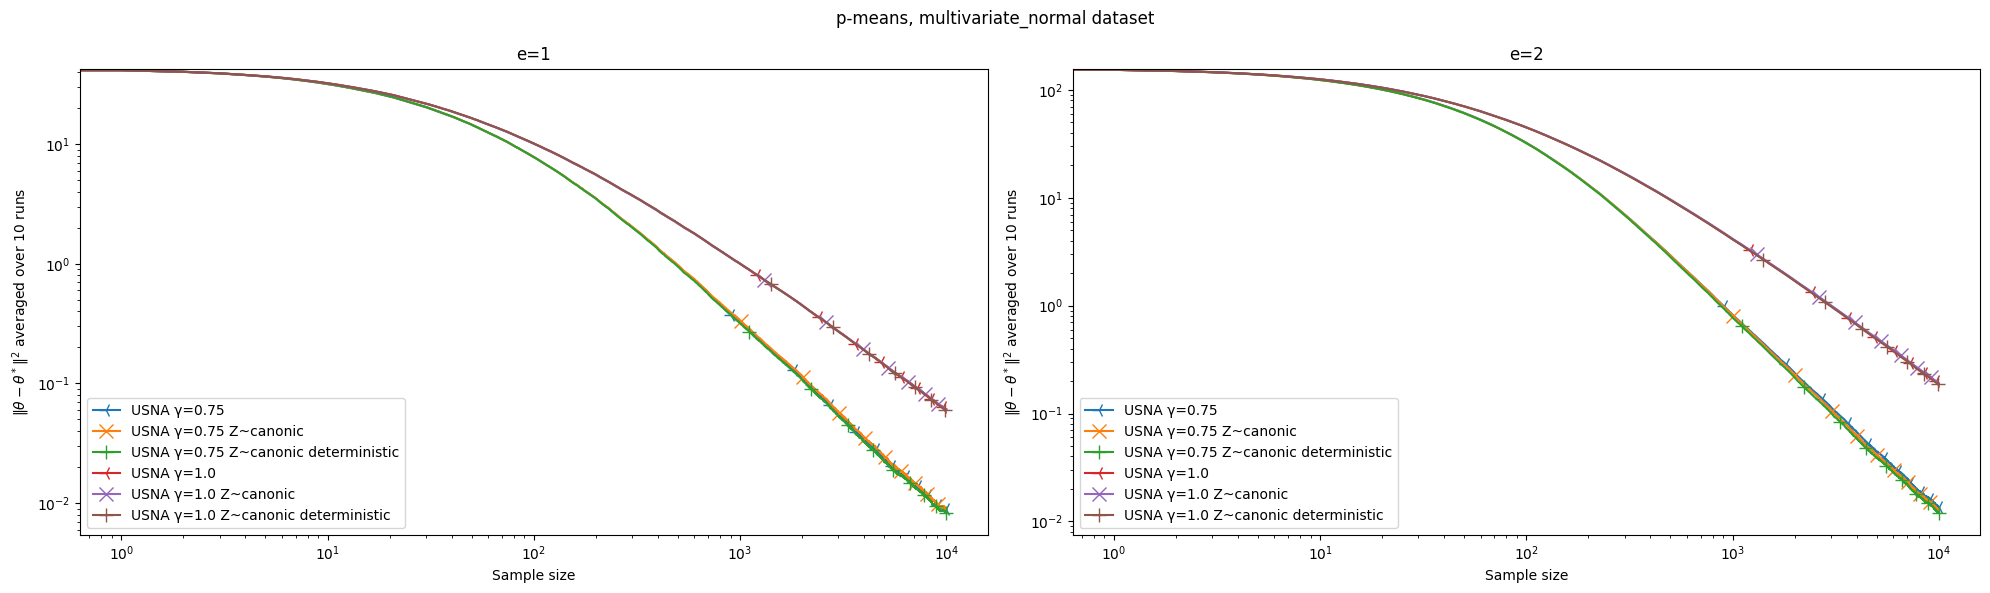

In [16]:
# Average over N runs
simulation.run_multiple_datasets(N=N, n=n, batch_size=batch_size)

## UWASNA

In [17]:
from import UWASNA

optimizer_list = [
    UWASNA(nu=1.0, gamma=0.75, generate_Z="normal"),
    UWASNA(nu=1.0, gamma=0.75, generate_Z="canonic"),
    UWASNA(nu=1.0, gamma=0.75, generate_Z="canonic deterministic"),
    UWASNA(nu=1.0, gamma=1.0, generate_Z="normal"),
    UWASNA(nu=1.0, gamma=1.0, generate_Z="canonic"),
    UWASNA(nu=1.0, gamma=1.0, generate_Z="canonic deterministic"),
]

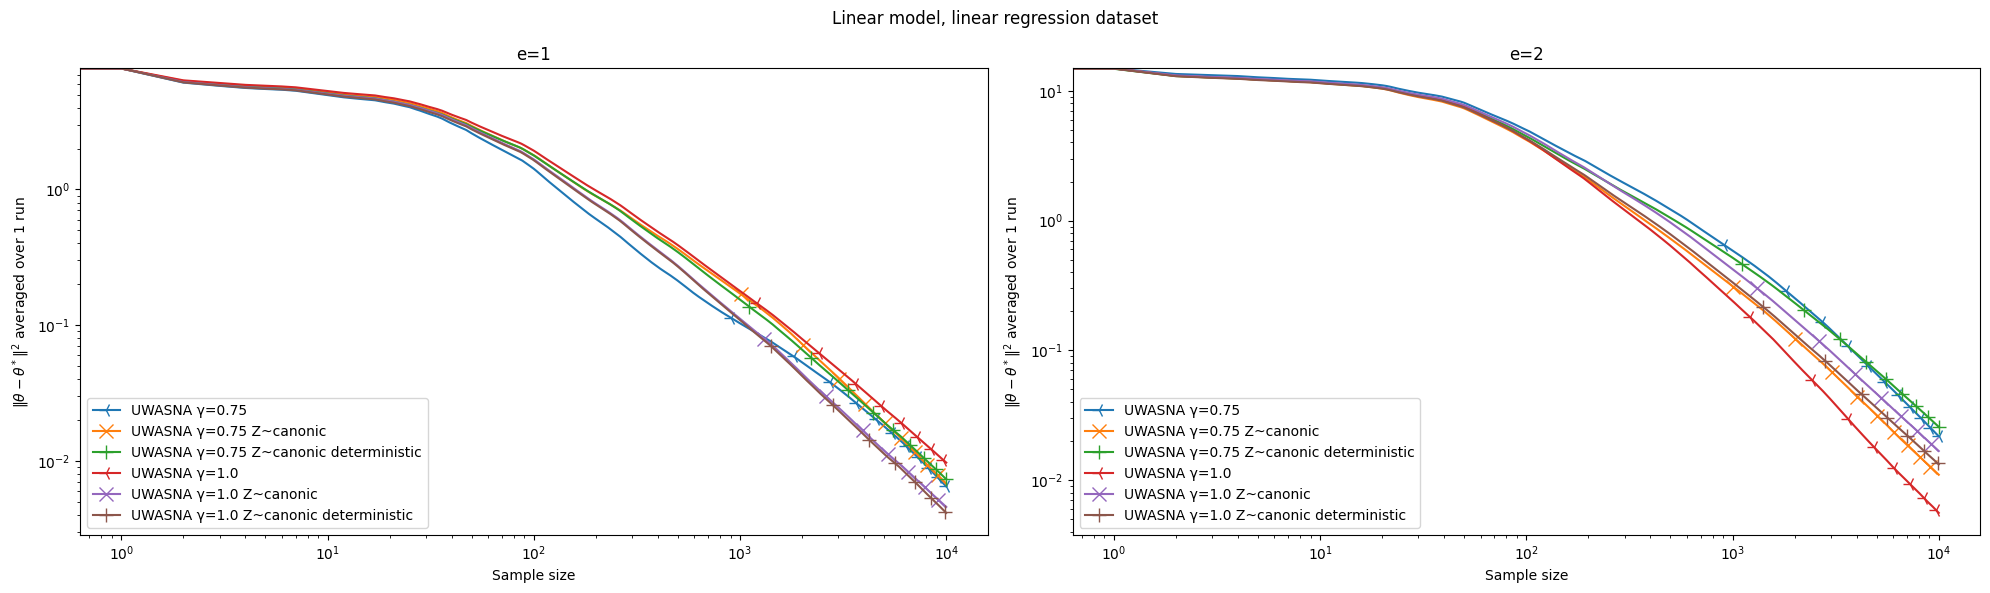

In [18]:
simulation = simulation_linear_regression(optimizer_list=optimizer_list)

# One run
simulation.run_multiple_datasets(N=1, n=n, batch_size=batch_size)

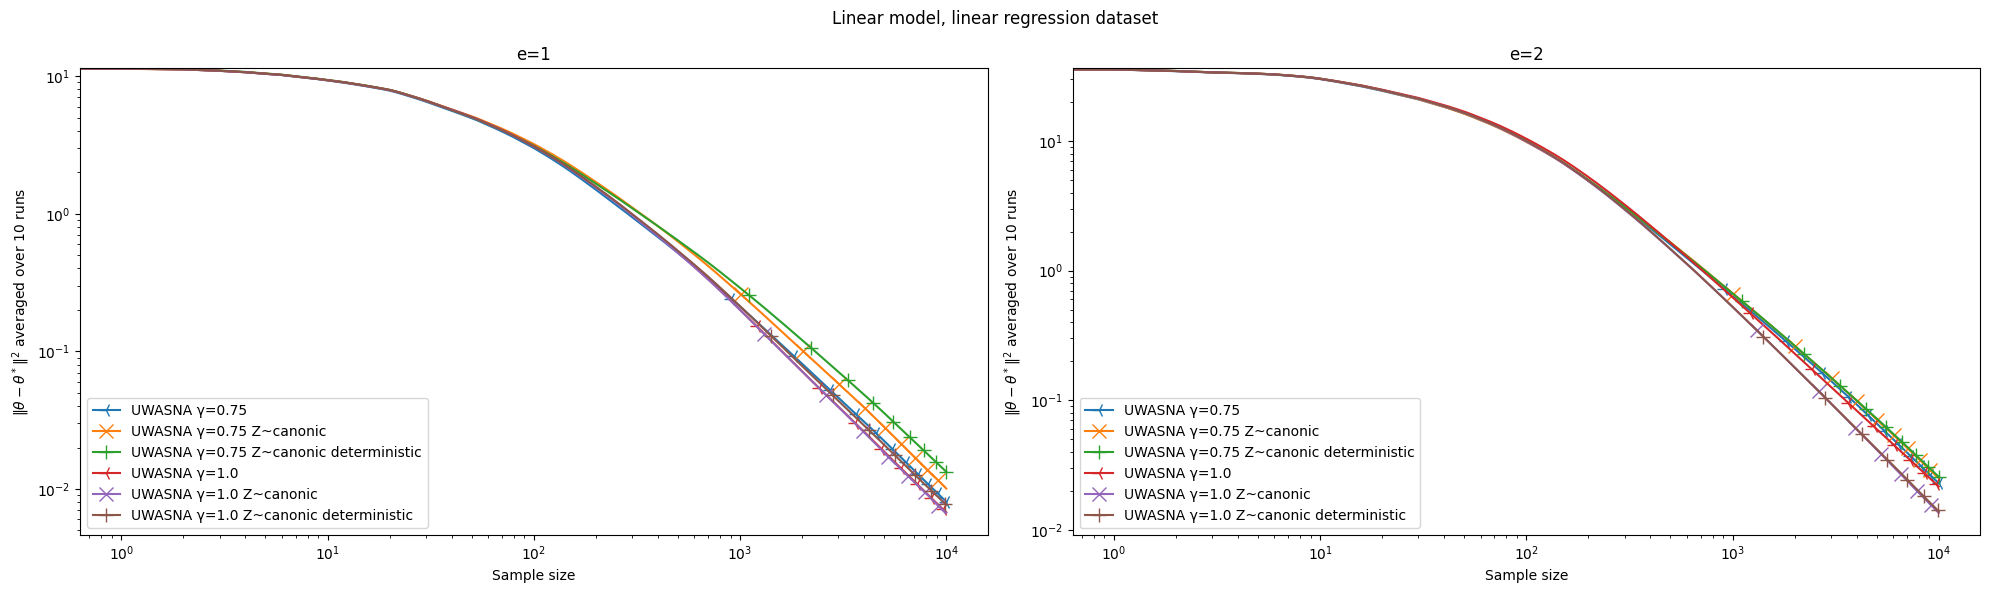

In [19]:
# Average over N runs
simulation.run_multiple_datasets(N=N, n=n, batch_size=batch_size)

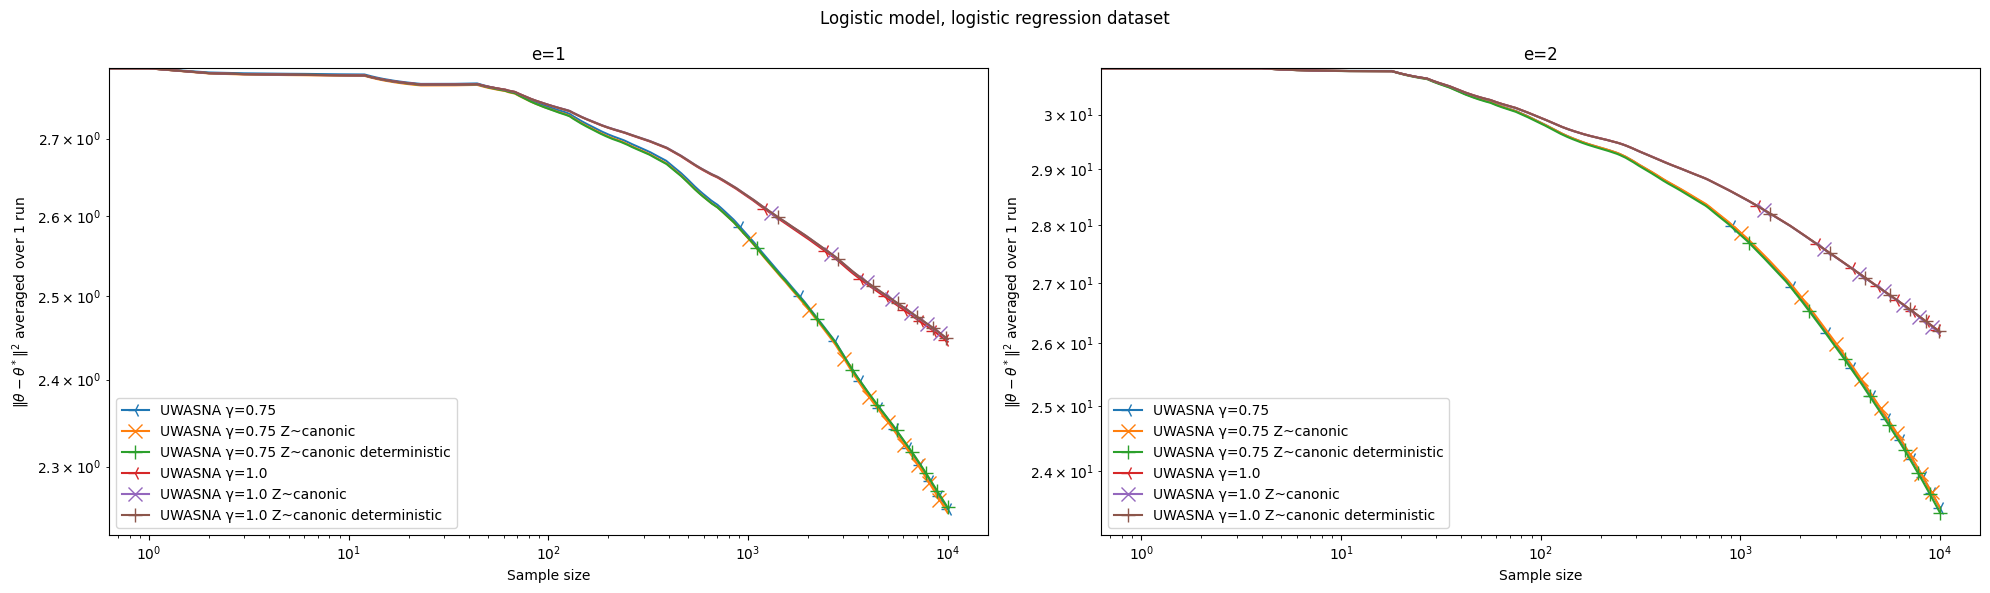

In [20]:
simulation = simulation_logistic_regression(optimizer_list=optimizer_list)

# One run
simulation.run_multiple_datasets(N=1, n=n, batch_size=batch_size)

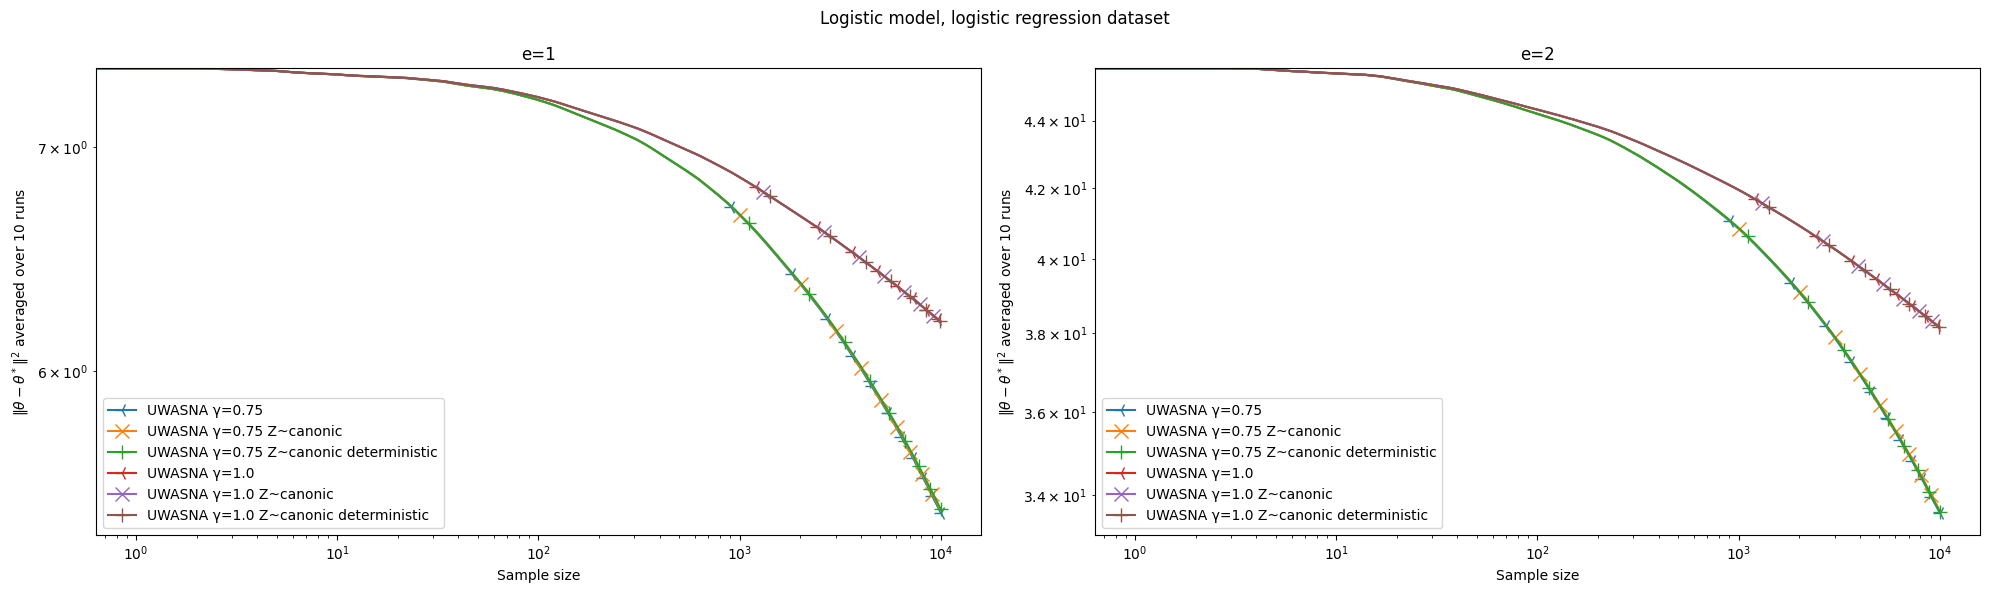

In [21]:
# Average over N runs
simulation.run_multiple_datasets(N=N, n=n, batch_size=batch_size)

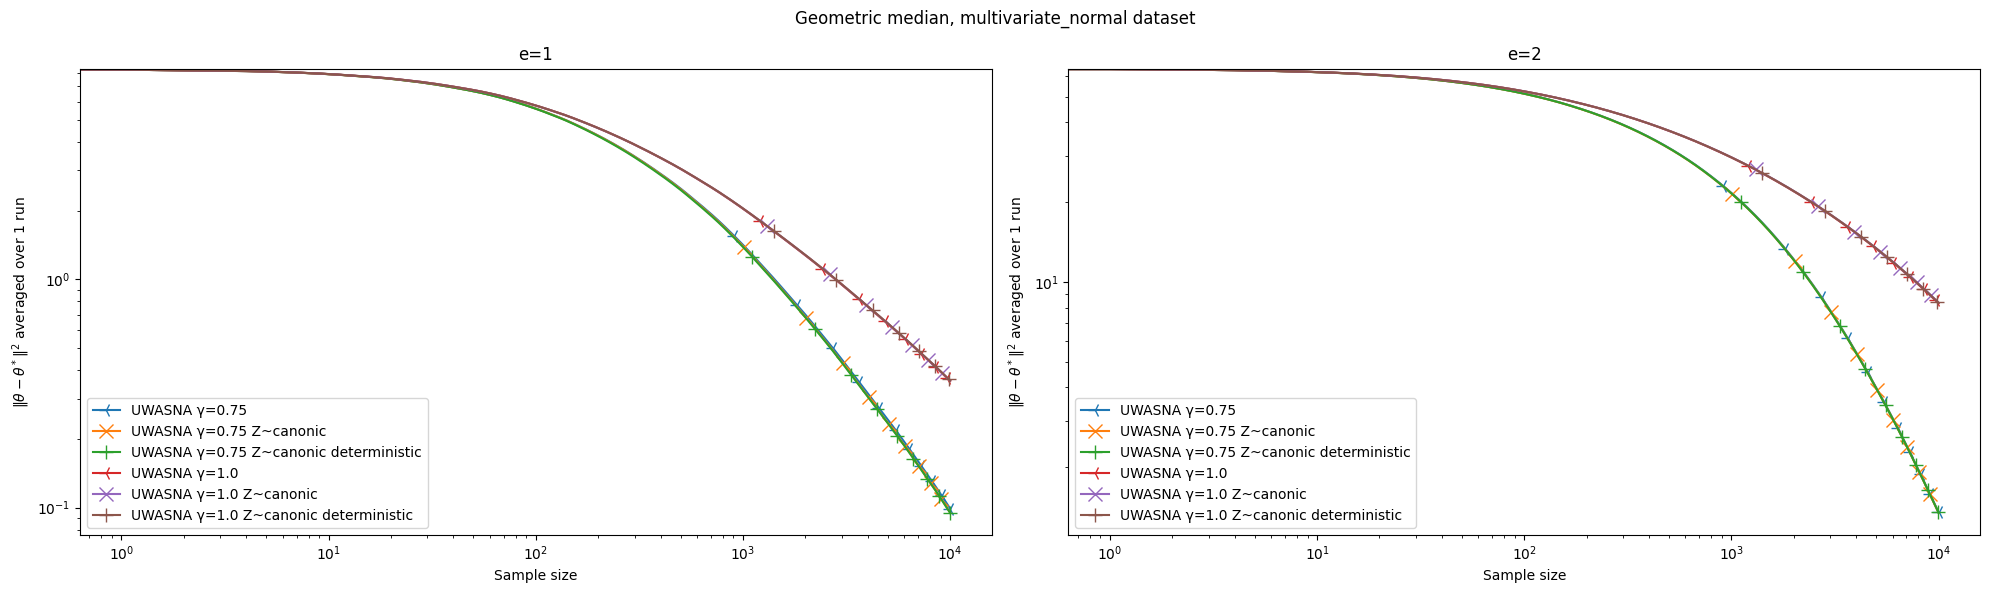

In [22]:
simulation = simulation_geometric_median(optimizer_list=optimizer_list)

# One run
simulation.run_multiple_datasets(N=1, n=n, batch_size=batch_size)

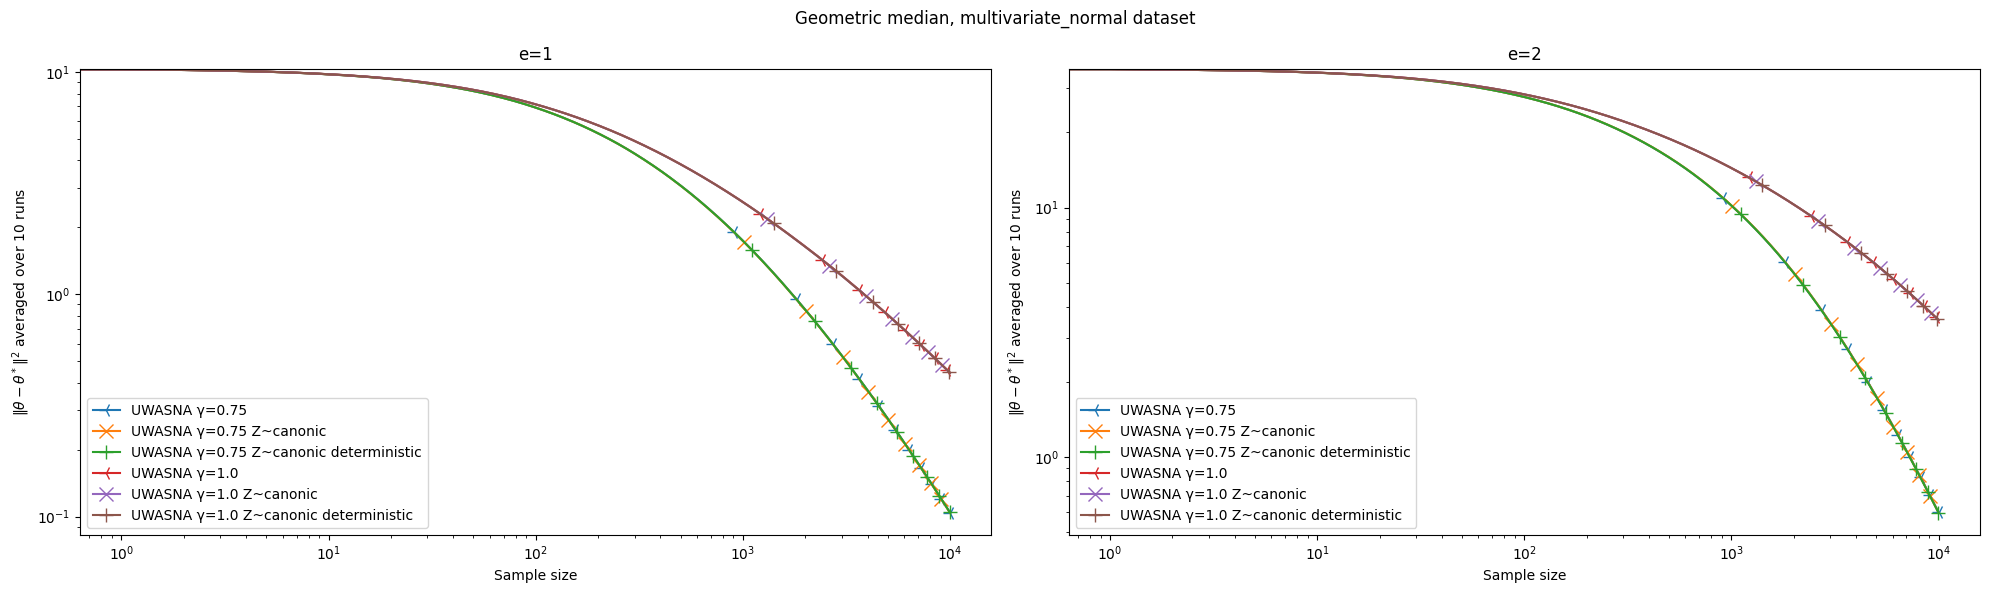

In [23]:
# Average over N runs
simulation.run_multiple_datasets(N=N, n=n, batch_size=batch_size)

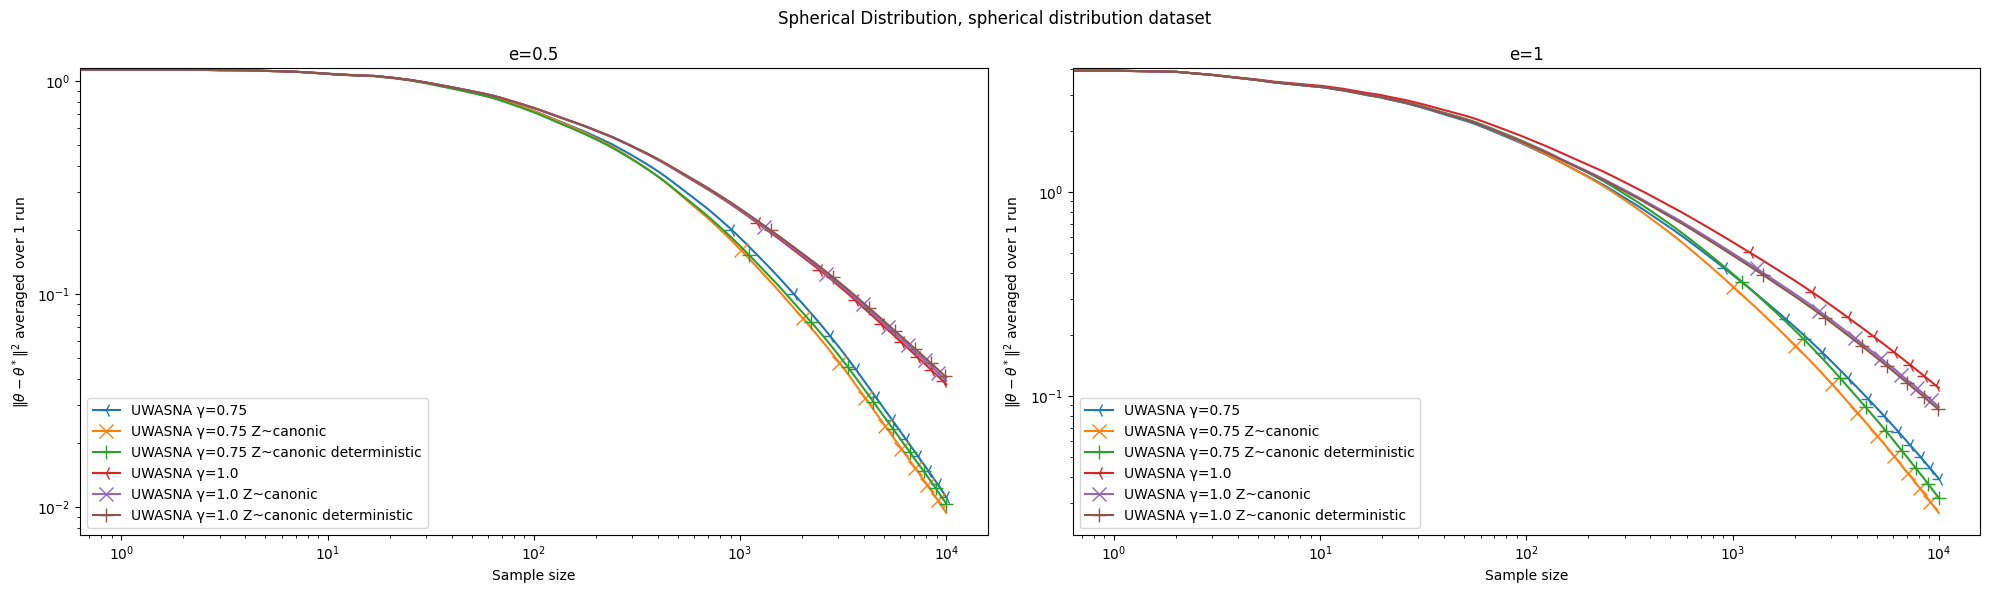

In [24]:
simulation = simulation_spherical_distribution(optimizer_list=optimizer_list)

# One run
simulation.run_multiple_datasets(N=1, n=n, batch_size=batch_size)

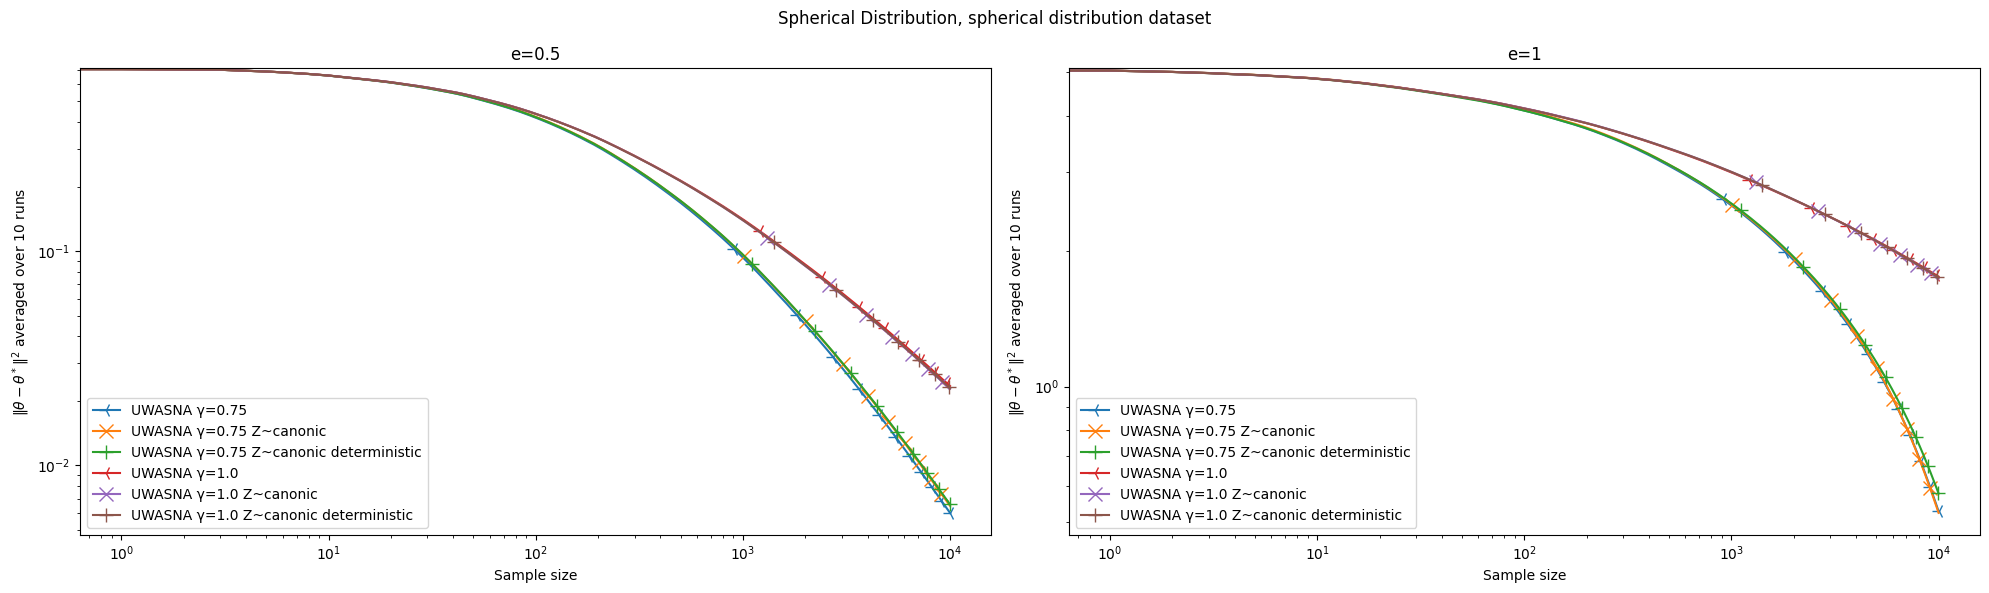

In [25]:
# Average over N runs
simulation.run_multiple_datasets(N=N, n=n, batch_size=batch_size)

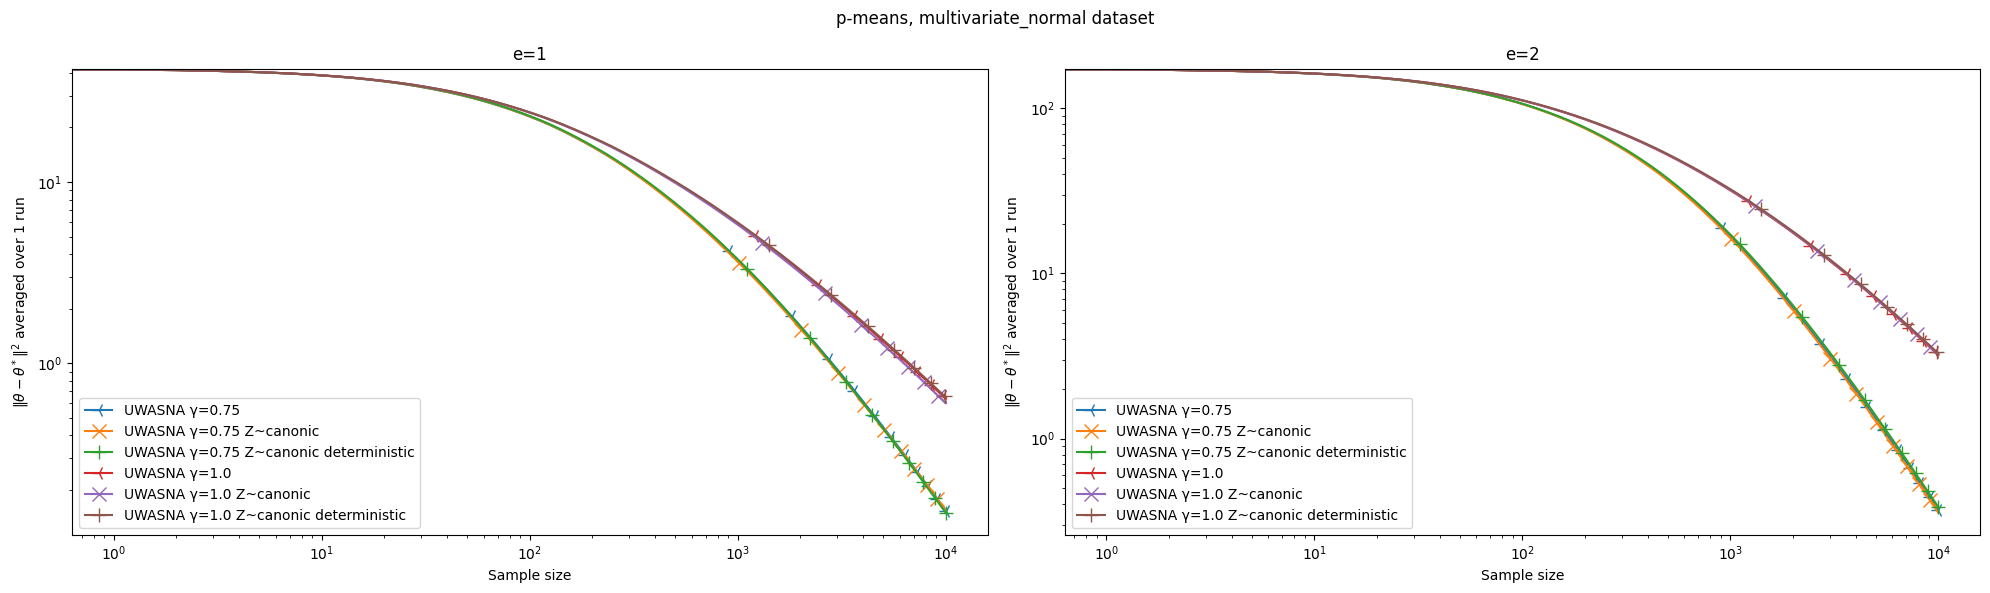

In [26]:
simulation = simulation_p_means(optimizer_list=optimizer_list)

# One run
simulation.run_multiple_datasets(N=1, n=n, batch_size=batch_size)

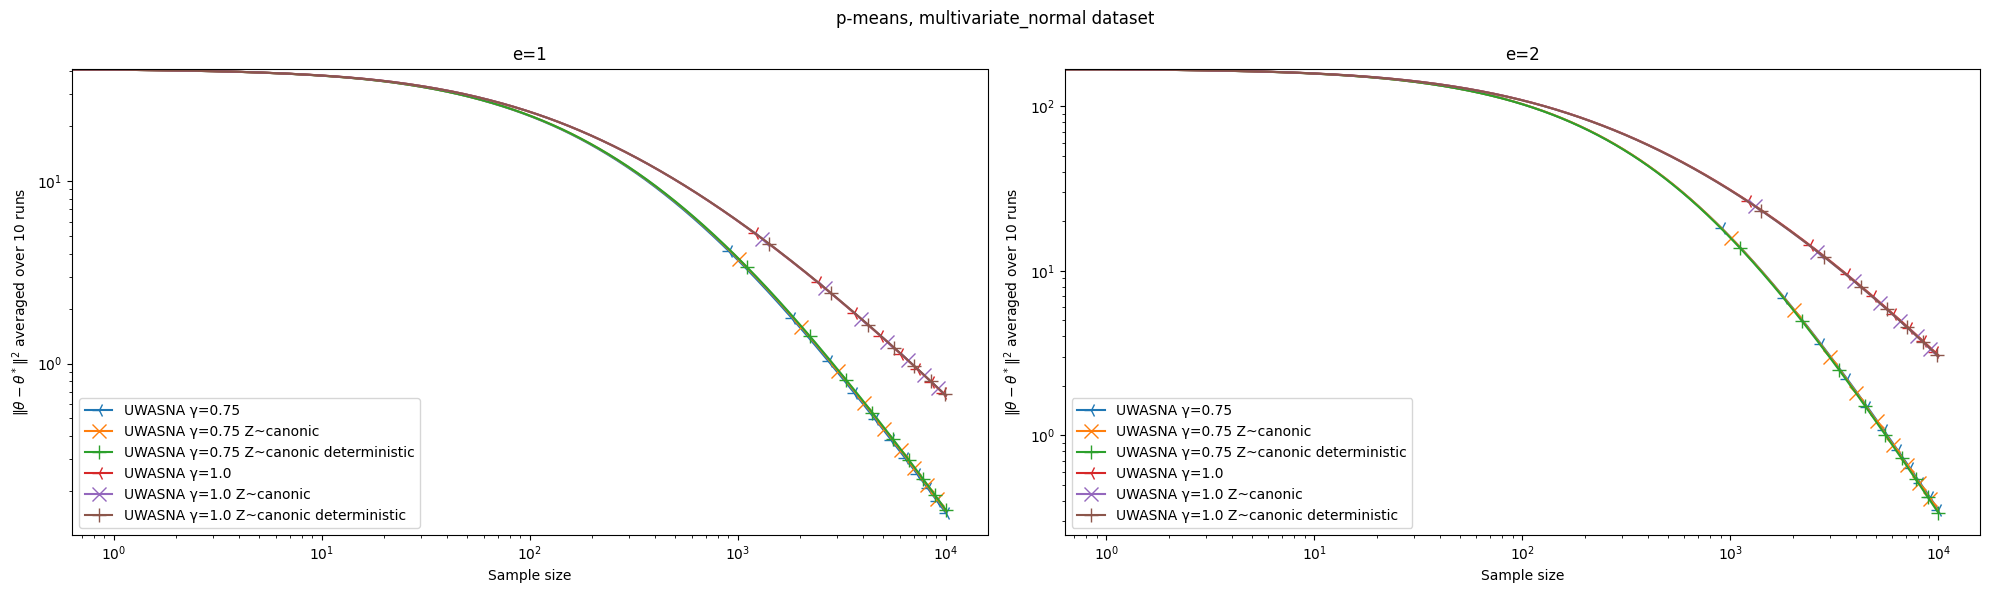

In [27]:
# Average over N runs
simulation.run_multiple_datasets(N=N, n=n, batch_size=batch_size)

# USNA : np.dot VS np.linalg.norm

In [28]:
import numpy as np
import timeit

# Generate random vectors Q and Z of size n
n = 1000  # Example vector size
Q = np.random.rand(n)
Z = np.random.rand(n)

# Define the functions to measure
def dot_product_approach():
    def step(iteration):
        gamma = 1 / iteration
        beta = 1 / (2 * gamma)
        return np.dot(Q, Q) <= beta**2

    for i in range(10_000, 100_000):
        res = step(i)

    return res


def norm_approach():
    def step(iteration):
        gamma = 1 / iteration
        beta = 1 / (2 * gamma)
        return np.linalg.norm(Q) <= beta

    for i in range(10_000, 100_000):
        res = step(i)

    return res


# Measure execution time
dot_time = timeit.timeit(dot_product_approach, number=10)
norm_time = timeit.timeit(norm_approach, number=10)

print("Time using np.dot for squared magnitude: {:.6f} seconds".format(dot_time))
print(
    "Time using np.linalg.norm for squared magnitude: {:.6f} seconds".format(norm_time)
)

Time using np.dot for squared magnitude: 0.557242 seconds
Time using np.linalg.norm for squared magnitude: 1.234475 seconds


# Test if $\Sigma$ is positive definite

In [29]:
import numpy as np

d = 40
covariance_matrix_article = np.zeros((d, d))

for i in range(d):
    for j in range(d):
        covariance_matrix_article[i, j] = 0.5 ** abs(i - j)

eigenvalues_article, eigenvectors_article = np.linalg.eigh(covariance_matrix_article)

print("Eigenvalues article:", eigenvalues_article, "\n")



Eigenvalues article: [0.33378311 0.33513697 0.33740856 0.3406209  0.34480689 0.3500099
 0.3562847  0.36369852 0.3723325  0.38228339 0.39366564 0.40661393
 0.42128624 0.43786747 0.45657387 0.47765818 0.50141587 0.52819241
 0.5583919  0.59248699 0.63103026 0.67466704 0.72414904 0.78034831
 0.84426963 0.91705853 1.         1.09449955 1.20203394 1.3240525
 1.46180258 1.61604608 1.78663365 1.97191901 2.16804427 2.36822408
 2.5623     2.73697296 2.87712068 2.96830993] 

